# Библиотеки

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score
# from catboost import CatBoostClassifier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Загрузка файлов

https://drive.google.com/file/d/1zqmL0SXzRnrqworr0C2dARvT2EjGjs75/view?usp=sharing

In [3]:
! gdown --id 1zqmL0SXzRnrqworr0C2dARvT2EjGjs75

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zqmL0SXzRnrqworr0C2dARvT2EjGjs75
To: /content/Московская_область.zip
100% 761k/761k [00:00<00:00, 133MB/s]


In [4]:
! unzip /content/Московская_область.zip -d /content/Московская_область

Archive:  /content/Московская_область.zip
  inflating: /content/Московская_область/decision.xlsx  
  inflating: /content/Московская_область/sample_solution.csv  
  inflating: /content/Московская_область/team_point.csv  
  inflating: /content/Московская_область/user.csv  
  inflating: /content/Московская_область/user_decision.csv  
  inflating: /content/Московская_область/Московская область.pdf  
  inflating: /content/Московская_область/Симуляция_baseline.ipynb  


https://drive.google.com/file/d/1S8gNv2K6OkGjyqhuU9xiIapFoYMiqdjM/view?usp=sharing

In [5]:
! gdown --id 1S8gNv2K6OkGjyqhuU9xiIapFoYMiqdjM

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1S8gNv2K6OkGjyqhuU9xiIapFoYMiqdjM
To: /content/train_dataset_train.csv
100% 15.0k/15.0k [00:00<00:00, 13.0MB/s]


In [6]:
train = pd.read_csv('/content/train_dataset_train.csv')

In [7]:
user = pd.read_csv('/content/Московская_область/user.csv')

In [8]:
user_decision = pd.read_csv('/content/Московская_область/user_decision.csv') 

In [9]:
team_point = pd.read_csv('/content/Московская_область/team_point.csv')

In [10]:
decision = pd.read_excel('/content/Московская_область/decision.xlsx')

In [11]:
sample_solution = pd.read_csv('/content/Московская_область/sample_solution.csv')

# Чтение файлов

In [12]:
train.head(3)

,id,Analytical thinking,Systemic thinking,Adaptability,Focus
0,10884,4.0,4.0,4.0,4.0
1,10106,5.0,4.0,5.0,5.0
2,10438,6.0,5.0,5.0,5.0


In [13]:
train = train.rename(columns={"id": "user_id", 'Analytical thinking' : 'analytical_thinking',
                              'Systemic thinking': 'systemic_thinking', 'Adaptability': 'adaptability', 'Focus': 'focus'})

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              680 non-null    int64  
 1   analytical_thinking  680 non-null    float64
 2   systemic_thinking    680 non-null    float64
 3   adaptability         680 non-null    float64
 4   focus                680 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 26.7 KB


In [15]:
user.head(3)

,user_id,team_id,game_id
0,10189,1664,235
1,10018,1690,237
2,10580,1394,194


In [16]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  973 non-null    int64
 1   team_id  973 non-null    int64
 2   game_id  973 non-null    int64
dtypes: int64(3)
memory usage: 22.9 KB


In [17]:
user_decision['user_id'].nunique()

973

In [18]:
user_decision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60228 entries, 0 to 60227
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      60228 non-null  int64
 1   period       60228 non-null  int64
 2   decision_id  60228 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


In [19]:
user_decision['user_id'].nunique()

973

In [20]:
user_decision

,user_id,period,decision_id
0,10625,1,409
1,10318,3,203
2,10775,4,420
3,10236,2,284
4,10130,3,72
...,...,...,...
60223,10312,3,329
60224,10189,1,33
60225,10346,3,123
60226,10424,2,140


In [21]:
user_decision.duplicated().sum()

5419

In [22]:
user_decision['user_id'].nunique()

973

In [23]:
user_decision[user_decision['user_id'] == 985]

,user_id,period,decision_id


In [24]:
# user_decision_train = user_decision.merge(train, how='left', on='user_id')

# Анализ и группировка данных

## 1) Групировка количества принятых решений в каждом периоде по каждому пользователю

In [25]:
df_decision_count = user_decision.groupby(by=["user_id",	"period"]).count() #.reset_index()

In [26]:
df_decision_count # количество решений принятых в каждом периоде

decision_id
user_id period             
10001   1                29
        2                23
        3                39
        4                15
10002   2                 9
...                     ...
10971   4                25
10972   4                 4
10973   1                 1
        3                18
        4                13

[3340 rows x 1 columns]

In [27]:
train['analytical_thinking'].value_counts()

4.0    417
5.0    209
3.0     36
6.0     14
1.0      4
Name: analytical_thinking, dtype: int64

In [28]:
train['systemic_thinking'].value_counts()

4.0    491
5.0    124
3.0     51
6.0     10
1.0      4
Name: systemic_thinking, dtype: int64

In [29]:
train['adaptability'].value_counts()

5.0    318
4.0    308
3.0     36
6.0     15
1.0      2
2.0      1
Name: adaptability, dtype: int64

In [30]:
train['focus'].value_counts()

4.0    400
5.0    244
3.0     29
6.0      3
1.0      3
2.0      1
Name: focus, dtype: int64

## 2) Суммарный скор команды по периодам

In [31]:
team_point

,team_id,category_id,period,score,place
0,1948,2,0,16,2
1,1934,3,4,45,6
2,1894,4,8,24,4
3,1688,4,0,27,4
4,1592,4,2,21,5
...,...,...,...,...,...
10981,1312,4,1,32,4
10982,1974,1,0,4,6
10983,1822,1,4,31,1
10984,1390,2,0,16,2


In [32]:
team_point.team_id.nunique()

355

In [33]:
user_team = user.merge(team_point, how='left', on='team_id')

In [34]:
user_team.head(3)

,user_id,team_id,game_id,category_id,period,score,place
0,10189,1664,235,3,1,105,2
1,10189,1664,235,4,3,33,2
2,10189,1664,235,2,2,17,4


In [35]:
user_team_score = user_team[["user_id",	"period", 'score']].groupby(by=["user_id",	"period"]).sum() #.reset_index()

In [36]:
user_team_score

score
user_id period       
10001   0         316
        1         582
        2         492
        3         656
        4         362
...               ...
10973   0         316
        1         382
        2         382
        3         -36
        4          20

[4865 rows x 1 columns]

In [37]:
user_team.period.unique()

array([1, 3, 2, 0, 4])

## 3) Сумма мест команды по периодам

In [38]:
user_team_place = user_team[["user_id",	"period", 'place']].groupby(by=["user_id",	"period"]).sum() #.reset_index()

In [39]:
user_team_place

place
user_id period       
10001   0          18
        1           6
        2          12
        3           9
        4          14
...               ...
10973   0          36
        1          16
        2          20
        3          33
        4          34

[4865 rows x 1 columns]

## 4) Оценка команды по категориям (не улучшило метрику)

In [40]:
team_category_score = user_team[["user_id",	"category_id", 'score']].groupby(by=["user_id",	"category_id"]).sum() #.reset_index()

In [41]:
user_team.category_id.unique()

array([3, 4, 2, 1, 5, 6])

In [42]:
team_category_score

score
user_id category_id       
10001   1              183
        2              147
        3              524
        4              183
        5              167
...                    ...
10973   2              -12
        3              329
        4              114
        5              105
        6              532

[5838 rows x 1 columns]

## Места команды по категориям (не улучшило метрику)

In [43]:
team_category_place = user_team[["user_id",	"category_id", 'place']].groupby(by=["user_id",	"category_id"]).sum() #.reset_index()

In [44]:
user_team.category_id.unique()

array([3, 4, 2, 1, 5, 6])

In [45]:
team_category_place

place
user_id category_id       
10001   1                7
        2               16
        3                8
        4               13
        5                7
...                    ...
10973   2               22
        3               26
        4               23
        5               21
        6               24

[5838 rows x 1 columns]

# Объединение и присоединение данных к train

In [46]:
train = pd.read_csv('/content/train_dataset_train.csv')
train = train.rename(columns={"id": "user_id", 'Analytical thinking' : 'analytical_thinking',
                              'Systemic thinking': 'systemic_thinking', 'Adaptability': 'adaptability', 'Focus': 'focus'})

In [47]:
for id in train.user_id.values:
  for period in range(0,5): #присоединяем количество действий в каждом периоде
    try :
      index = train[train.user_id == id].index[0]
      train.loc[index,"period_"+str(period)] = df_decision_count.loc[pd.IndexSlice[id, period:period], :].values[0][0]
    except IndexError:
      continue
  for period in range(0,5): #присоединяем скор команды суммарный
    try :
      index = train[train.user_id == id].index[0]
      train.loc[index,"period_team_score"+str(period)] = user_team_score.loc[pd.IndexSlice[id, period:period], :].values[0][0]
    except IndexError:
      continue
  for period in range(0,5): #присоединяем плейс команды суммарный
    try :
      index = train[train.user_id == id].index[0]
      train.loc[index,"period_team_place"+str(period)] = user_team_place.loc[pd.IndexSlice[id, period:period], :].values[0][0]
    except IndexError:
      continue
  # for period in range(1,7): # оценка команды по категориям
  #   try :
  #     index = train[train.user_id == id].index[0]
  #     train.loc[index,"team_category_score"+str(period)] = team_category_score.loc[pd.IndexSlice[id, period:period], :].values[0][0]
  #   except IndexError:
  #     continue
  # for period in range(1,7): # оценка команды по категориям
  #   try :
  #     index = train[train.user_id == id].index[0]
  #     train.loc[index,"team_category_place"+str(period)] = team_category_place.loc[pd.IndexSlice[id, period:period], :].values[0][0]
  #   except IndexError:
  #     continue

In [48]:
train.head(3)

,user_id,analytical_thinking,systemic_thinking,adaptability,focus,period_1,period_2,period_3,period_4,period_team_score0,period_team_score1,period_team_score2,period_team_score3,period_team_score4,period_team_place0,period_team_place1,period_team_place2,period_team_place3,period_team_place4
0,10884,4.0,4.0,4.0,4.0,7.0,14.0,28.0,10.0,316.0,284.0,166.0,120.0,302.0,18.0,26.0,29.0,31.0,21.0
1,10106,5.0,4.0,5.0,5.0,21.0,21.0,12.0,8.0,316.0,338.0,468.0,398.0,308.0,30.0,19.0,7.0,11.0,17.0
2,10438,6.0,5.0,5.0,5.0,62.0,45.0,63.0,38.0,316.0,184.0,598.0,340.0,166.0,18.0,26.0,7.0,12.0,19.0


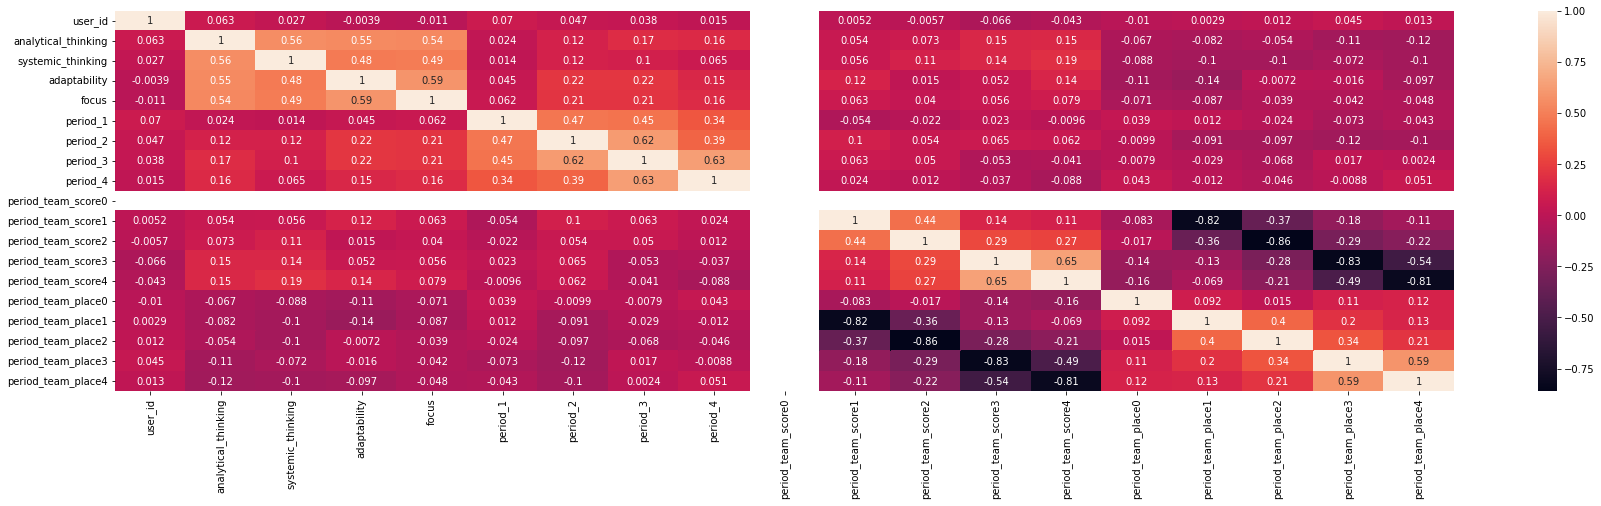

In [49]:
plt.figure(figsize = (30,7))
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [50]:
train = train.fillna(0)

# Х для train_test_split

In [51]:
X = train.drop(['analytical_thinking', 'systemic_thinking','adaptability','focus', 'user_id', 'period_team_score0'], axis = 1)

In [52]:
X.columns

Index(['period_1', 'period_2', 'period_3', 'period_4', 'period_team_score1',
       'period_team_score2', 'period_team_score3', 'period_team_score4',
       'period_team_place0', 'period_team_place1', 'period_team_place2',
       'period_team_place3', 'period_team_place4'],
      dtype='object')

In [53]:
X.shape

(680, 13)

In [92]:
X.head(3)

,period_1,period_2,period_3,period_4,period_team_score1,period_team_score2,period_team_score3,period_team_score4,period_team_place0,period_team_place1,period_team_place2,period_team_place3,period_team_place4
0,7.0,14.0,28.0,10.0,284.0,166.0,120.0,302.0,18.0,26.0,29.0,31.0,21.0
1,21.0,21.0,12.0,8.0,338.0,468.0,398.0,308.0,30.0,19.0,7.0,11.0,17.0
2,62.0,45.0,63.0,38.0,184.0,598.0,340.0,166.0,18.0,26.0,7.0,12.0,19.0


# Тестирование моделей

## RandomForest

In [57]:
targets = ['analytical_thinking', 'systemic_thinking','adaptability','focus']


In [58]:
def get_model_result(model):
  result = 0
  for i in targets:
    y = train[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = model(random_state=19, max_depth = 15, min_samples_split = 3)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    result += recall_score(y_train, pred, average='macro', zero_division=True)
  return result/4

In [59]:
print(get_model_result(RandomForestClassifier))

0.9813943771227053


In [60]:
def get_model_result_test(model):
  result = 0
  for i in targets:
    y = train[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = model(random_state=19, max_depth = 15, min_samples_split = 3)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    result += recall_score(y_test, pred, average='macro', zero_division=True)
  return result/4

In [61]:
print(get_model_result_test(RandomForestClassifier))

0.28633303130113086


## ExtraTreeClassifier

In [62]:
print(get_model_result(ExtraTreesClassifier))

0.9975284679089027


In [63]:
print(get_model_result_test(ExtraTreesClassifier))

0.2933277552983906


## XGBoost

In [64]:
def get_model_result2(model):
  result = 0
  for i in targets:
    y = train[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = model(random_state=19)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    result += recall_score(y_train, pred, average='macro', zero_division=True)
  return result/4

In [65]:
def get_model_result_test2(model):
  result = 0
  for i in targets:
    y = train[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = model(random_state=19)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    result += recall_score(y_test, pred, average='macro', zero_division=True)
  return result/4

In [66]:
print(get_model_result2(XGBClassifier))

0.8099874255053491


In [67]:
print(get_model_result_test2(XGBClassifier))

0.2920514626038906


## LGBMClassifier

In [68]:
print(get_model_result2(lgb.LGBMClassifier))

0.9994199349038059


In [69]:
print(get_model_result_test2(lgb.LGBMClassifier))

0.36208281181968205


## GaussianNB

In [70]:
def get_model_results_1(model):
  result = 0
  for i in targets:
    y = train[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = model()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    result += recall_score(y_train, pred, average='macro', zero_division=True)
  return result/4

In [71]:
def get_model_result_test_1(model):
  result = 0
  for i in targets:
    y = train[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = model()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    result += recall_score(y_test, pred, average='macro', zero_division=True)
  return result/4

In [72]:
print(get_model_results_1(GaussianNB))

0.4378397169218021


In [73]:
print(get_model_result_test_1(GaussianNB))

0.3714824124411116


## KNeighborsClassifier

In [74]:
print(get_model_results_1(KNeighborsClassifier))

0.2731741431657291


In [75]:
print(get_model_result_test_1(KNeighborsClassifier))

0.25241534529142856


# Финальный тест

In [76]:
sample_solution = pd.read_csv('/content/Московская_область/sample_solution.csv')

In [77]:
sample_solution

,id,Analytical thinking,Systemic thinking,Adaptability,Focus
0,10199,0,0,0,0
1,10539,0,0,0,0
2,10174,0,0,0,0
3,10465,0,0,0,0
4,10066,0,0,0,0
...,...,...,...,...,...
288,10433,0,0,0,0
289,10893,0,0,0,0
290,10909,0,0,0,0
291,10889,0,0,0,0


In [78]:
sample_solution = sample_solution.rename(columns={"id": "user_id", 'Analytical thinking' : 'analytical_thinking',
                              'Systemic thinking': 'systemic_thinking', 'Adaptability': 'adaptability', 'Focus': 'focus'})

In [79]:
for id in sample_solution.user_id.values:
  for period in range(0,5): #присоединяем количество действий в каждом периоде
    try :
      index = sample_solution[sample_solution.user_id == id].index[0]
      sample_solution.loc[index,"period_"+str(period)] = df_decision_count.loc[pd.IndexSlice[id, period:period], :].values[0][0]
    except IndexError:
      continue
  for period in range(0,5): #присоединяем скор команды суммарный
    try :
      index = sample_solution[sample_solution.user_id == id].index[0]
      sample_solution.loc[index,"period_team_score"+str(period)] = user_team_score.loc[pd.IndexSlice[id, period:period], :].values[0][0]
    except IndexError:
      continue
  for period in range(0,5): #присоединяем плейс команды суммарный
    try :
      index = sample_solution[sample_solution.user_id == id].index[0]
      sample_solution.loc[index,"period_team_place"+str(period)] = user_team_place.loc[pd.IndexSlice[id, period:period], :].values[0][0]
    except IndexError:
      continue

In [80]:
sample_solution = sample_solution.fillna(0)

In [81]:
sample_solution

,user_id,analytical_thinking,systemic_thinking,adaptability,focus,period_1,period_2,period_3,period_4,period_team_score0,period_team_score1,period_team_score2,period_team_score3,period_team_score4,period_team_place0,period_team_place1,period_team_place2,period_team_place3,period_team_place4
0,10199,0,0,0,0,2.0,2.0,3.0,2.0,316.0,404.0,330.0,182.0,192.0,30.0,12.0,9.0,27.0,28.0
1,10539,0,0,0,0,1.0,9.0,15.0,17.0,316.0,214.0,362.0,82.0,194.0,6.0,29.0,23.0,32.0,23.0
2,10174,0,0,0,0,0.0,28.0,31.0,20.0,316.0,554.0,636.0,410.0,352.0,6.0,13.0,6.0,15.0,12.0
3,10465,0,0,0,0,15.0,18.0,32.0,18.0,316.0,322.0,288.0,160.0,166.0,24.0,13.0,19.0,25.0,26.0
4,10066,0,0,0,0,8.0,23.0,16.0,6.0,316.0,266.0,24.0,32.0,152.0,12.0,23.0,33.0,34.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,10433,0,0,0,0,18.0,7.0,1.0,0.0,316.0,512.0,292.0,654.0,676.0,24.0,9.0,25.0,9.0,9.0
289,10893,0,0,0,0,21.0,52.0,34.0,20.0,316.0,238.0,350.0,630.0,332.0,18.0,18.0,14.0,8.0,22.0
290,10909,0,0,0,0,0.0,0.0,0.0,1.0,316.0,358.0,328.0,376.0,152.0,24.0,20.0,13.0,12.0,28.0
291,10889,0,0,0,0,6.0,2.0,5.0,1.0,316.0,238.0,528.0,610.0,444.0,30.0,22.0,11.0,14.0,19.0


In [82]:
X_sample = sample_solution.drop(['analytical_thinking', 'systemic_thinking','adaptability','focus', 'user_id', 'period_team_score0'], axis = 1)

In [83]:
X.shape

(680, 13)

In [84]:
X_sample.shape

(293, 13)

In [85]:
def get_model_result_submission(model):
  result = 0
  for i in targets:
    y = train[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = model()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_sample)
    sample_solution[i] = pred

  return sample_solution.iloc[:, :5]

In [86]:
submission = get_model_result_submission(GaussianNB)

In [87]:
submission

,user_id,analytical_thinking,systemic_thinking,adaptability,focus
0,10199,4.0,4.0,4.0,4.0
1,10539,4.0,4.0,4.0,4.0
2,10174,5.0,5.0,5.0,4.0
3,10465,4.0,4.0,4.0,4.0
4,10066,4.0,3.0,4.0,4.0
...,...,...,...,...,...
288,10433,6.0,5.0,5.0,4.0
289,10893,5.0,4.0,5.0,5.0
290,10909,4.0,4.0,4.0,4.0
291,10889,4.0,4.0,3.0,4.0


In [88]:
submission = submission.rename(columns={"user_id": "id", 'analytical_thinking': 'Analytical thinking',
                              'systemic_thinking': 'Systemic thinking', 'adaptability': 'Adaptability', 'focus': 'Focus'})

In [89]:
submission.to_csv('submission_GaussianNB_final.csv', index=False)

In [91]:
submission = pd.read_csv('/content/submission_GaussianNB_final.csv')
submission

,id,Analytical thinking,Systemic thinking,Adaptability,Focus
0,10199,4.0,4.0,4.0,4.0
1,10539,4.0,4.0,4.0,4.0
2,10174,5.0,5.0,5.0,4.0
3,10465,4.0,4.0,4.0,4.0
4,10066,4.0,3.0,4.0,4.0
...,...,...,...,...,...
288,10433,6.0,5.0,5.0,4.0
289,10893,5.0,4.0,5.0,5.0
290,10909,4.0,4.0,4.0,4.0
291,10889,4.0,4.0,3.0,4.0
